In [0]:
# Inisialisasi Awal
import numpy as np
import pandas as pd
import random
from matplotlib import pyplot as plt

### **Fungsi Kopi**

In [0]:
def kopi2(z, memo):
    try:
        memo[id(memo)].append(z)
    except KeyError:
        # aha, this is the first one :-)
        memo[id(memo)]=[z]

def kopi(z, memo=None, _nil=[]):
    if memo is None:
        memo = {}
    d = id(z)
    y = memo.get(d, _nil)
    if y is not _nil:
        return y
    cls = type(z)
    copier = copy.get(cls)
    if copier is not None:
        y = copier(z, memo)
    else:
        if issubclass(cls, type):
            y = _deepcopy_atomic(z, memo)
        else:
            copier = getattr(z, "__deepcopy__", None)
            if copier is not None:
                y = copier(memo)
            else:
                reductor = dispatch_table.get(cls)
                if reductor:
                    rv = reductor(z)
                else:
                    reductor = getattr(z, "__reduce_ex__", None)
                    if reductor is not None:
                        rv = reductor(4)
                    else:
                        reductor = getattr(z, "__reduce__", None)
                        if reductor:
                            rv = reductor()
                        else:
                            raise Error(
                                "un(deep)copyable object of type %s" % cls)
                if isinstance(rv, str):
                    y = z
                else:
                    y = _reconstruct(x, memo, *rv)

    # If is its own copy, don't memoize.
    if y is not z:
        memo[d] = y
        kopi2(z, memo) # Make sure x lives at least as long as d
    return y

copy = d = {}

# **Proses Sebelum Prosesing Data / Preprocessing**

In [0]:
from google.colab import files
uploaded = files.upload()

In [0]:
# Proses Pemasukan Dataset
# Untuk memasukkan dataset bisa diupload terlebih dahulu atau bisa juga lewat mount di drive
data = pd.read_csv('/content/drive/My Drive/Colab Notebooks/dataset/air_bnb.csv') # -> Menggunakan Google Drive
# data = pd.read_csv("air_bnb.csv") # -> Jika menggunakan upload file diatas
data = data.dropna() # Pemrosesan pembersihan data eg. data NaN
print(data.shape)
# data.head()
data.corr()
# data

(18587, 16)


,id,host_id,latitude,longitude,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365
id,1.000000,0.529061,0.009481,-0.011130,0.000277,-0.054662,-0.325041,0.249646,0.012867,-0.127672
host_id,0.529061,1.000000,0.011986,-0.040759,0.009007,-0.032021,-0.151823,0.203172,-0.059423,-0.048568
latitude,0.009481,0.011986,1.000000,-0.108399,0.016700,0.012141,0.041651,0.042702,0.044980,0.016929
longitude,-0.011130,-0.040759,-0.108399,1.000000,-0.023788,-0.019258,-0.026277,-0.041849,-0.038680,-0.085327
price,0.000277,0.009007,0.016700,-0.023788,1.000000,0.005248,0.017245,0.013244,0.047792,0.086712
minimum_nights,-0.054662,-0.032021,0.012141,-0.019258,0.005248,1.000000,-0.015137,-0.047488,0.018061,0.078797
number_of_reviews,-0.325041,-0.151823,0.041651,-0.026277,0.017245,-0.015137,1.000000,0.556335,0.092513,0.290069
reviews_per_month,0.249646,0.203172,0.042702,-0.041849,0.013244,-0.047488,0.556335,1.000000,0.121038,0.231708
calculated_host_listings_count,0.012867,-0.059423,0.044980,-0.038680,0.047792,0.018061,0.092513,0.121038,1.000000,0.233694
availability_365,-0.127672,-0.048568,0.016929,-0.085327,0.086712,0.078797,0.290069,0.231708,0.233694,1.000000


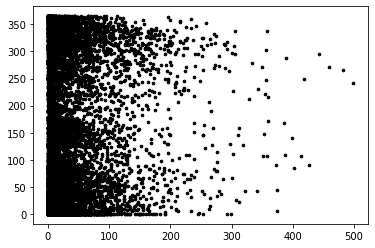

In [0]:
# Proses mendapatkan Nilai dan Untuk di Plot di grafik
# Saya memilih number_of_reviews dan availability_365 karena dari hasil korelasi data yang saya lakukan diatas, nilainya cukup bagus untuk di modelkan
a1 = data['number_of_reviews'].values
a2 = data['availability_365'].values
#a3 = data['minimum_nights'].values
x = np.array(list(zip(a1, a2)))
plt.scatter(a1, a2, c='black', s=7)

In [0]:
# Kalkulator Jarak Euclidean
def jarak(a, b, ax=1):
    return np.linalg.norm(a - b, axis=ax)

# **Proses Pemilihan Centroid**

[188, 3, 440]
[404, 228, 372]
 
Centroid
[[188 404]
 [  3 228]
 [440 372]]
---------------------------------------------------------------------------------------------------------------------------------------



Text(0, 0.5, 'availability_365')

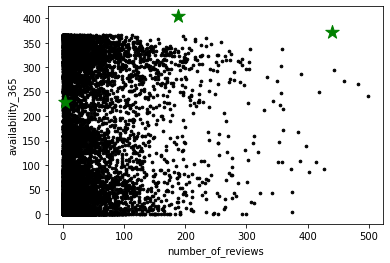

In [0]:
# Pemrosesan Jumlah dan Lokasi Centroid
jumlah_kluster = 3
cx = []
cy = []
# Koordinat X dari nilai centroid acak
for i in range(jumlah_kluster):
  cx.append(random.randint(0, np.max(x)-20))
print(cx)
# Koordinat Y dari nilai centroid acak
for i in range(jumlah_kluster):
  cy.append(random.randint(0, np.max(x)-20))
print(cy)
centroid = np.array(list(zip(cx, cy)))
print(" ")
print("Centroid")
print(centroid)
print('---------------------------------------------------------------------------------------------------------------------------------------')
print('')

# Pemlotingan grafik dengan centroid
plt.scatter(a1, a2, color='black', s=7)
plt.scatter(cx, cy, marker='*', s=200, c='g')
plt.xlabel('number_of_reviews')
plt.ylabel('availability_365')

# **Proses untuk Clustering dan Pembagian data nya**
**Menggunakan Metode K-Means**

Text(0, 0.5, 'availability_365')

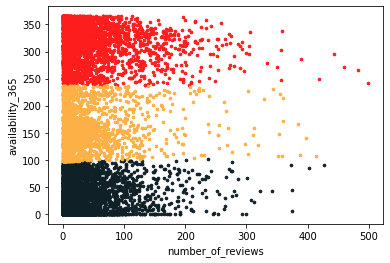

In [0]:
# Untuk menampung nilai dari centroid ketika di update
c2 = np.zeros(centroid.shape)
# Untuk Pelabelan kluster (0,1,2)
klaster = np.zeros(len(x))
# Pemberian warna untuk membedakan kluster di grafik
warna1 = ['#fd1d1d', '#0F2027', '#fcb045', '#833ab4', '#203A43', '#2C5364']
# Fungsi eror. jarak diantara centroid baru dan centroid lama
eror = jarak(centroid, c2, None)
# Perulangan hingga eror menjadi nol
while eror != 0:
  # Menetapkan setiap nilai ke klaster terdekatnya
  for i in range(len(x)):
    distance = jarak(x[i], centroid)
    jarak_klaster = np.argmin(distance)
    klaster[i] = jarak_klaster
  # Menampung nilai centroid yang lama
  c_lama = kopi(centroid)
  # Mencari centroid yang baru dengan mengambil nilai rata-ratanya
  for i in range(jumlah_kluster):
    h = []
    for j in range(len(x)):
      if klaster[j] == i:
        h = x[j]
    poin = [h]
    centroid[i] = np.mean(poin, axis=0)
  eror = jarak(centroid, c_lama, None)

figur, ax = plt.subplots()
# Proses penampilan grafik yang telah terbagi-bagi menjadi kluster
for i in range(jumlah_kluster):
  poin = np.array([x[j] for j in range(len(x)) if klaster[j] == i])
  ax.scatter(poin[:, 0], poin[:, 1], s=7, c=warna1[i])
plt.xlabel('number_of_reviews')
plt.ylabel('availability_365')

# **Proses Evaluasi dengan metode Silhouette coefficient**
*Silhouette coefficient* menggabungkan ide-ide kohesi dan pemisahan, tetapi untuk poin individu

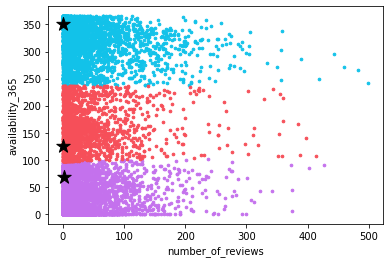

In [0]:
figur, ax = plt.subplots()
warna2 = ['#12c2e9', '#c471ed', '#f64f59', '#00416A', '#799F0C', '#FFE000']
for i in range(jumlah_kluster):
  poin = np.array([x[j] for j in range(len(x)) if klaster[j] == i])
  ax.scatter(poin[:, 0], poin[:, 1], s=7, c=warna2[i])
# Menampilkan Lokasi centroid baru untuk setiap kluster data
plt.xlabel('number_of_reviews')
plt.ylabel('availability_365')
ax.scatter(centroid[:, 0], centroid[:, 1], marker='*', s=200, c='black')

# **KESIMPULAN**
---
Mengelompokkan data-data dari dua kolom berbeda untuk dijadikan dalam kelompok-kelompok yang mirip satu sama lainnya, disini saya mengelompokkan menjadi 3 jenis saja, untuk memudahkan.